### Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
from nltk.tokenize import regexp_tokenize
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### Load the dataset

In [34]:
df = pd.read_csv("/train.csv")
df_test = pd.read_csv("/test.csv")

### Check the head of the data

In [35]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [36]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Check the Info of the data

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Check the missing data and count the precentage

In [39]:
count = df.isnull().sum()
precentage = df.isnull().mean().round(4) * 100

pd.DataFrame({'count': count, 'precentage': precentage}).sort_values('count', ascending=False)

,count,precentage
location,2533,33.27
keyword,61,0.80
id,0,0.00
text,0,0.00
target,0,0.00


### Data in each class

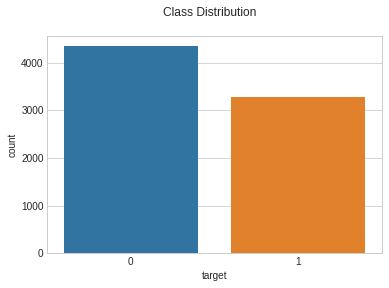

In [40]:
sns.countplot(x='target', data=df)
plt.suptitle('Class Distribution')
plt.show()

### Getting top 15 location

In [41]:
df['location'].value_counts()[:15]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

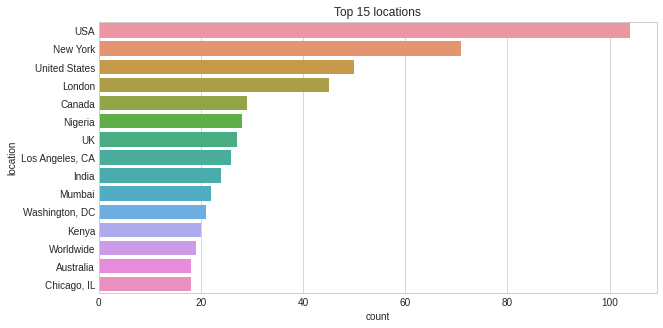

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df.location, order = df.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

### Getting top 15 keyword

In [43]:
print(df['keyword'].value_counts()[:15])

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64


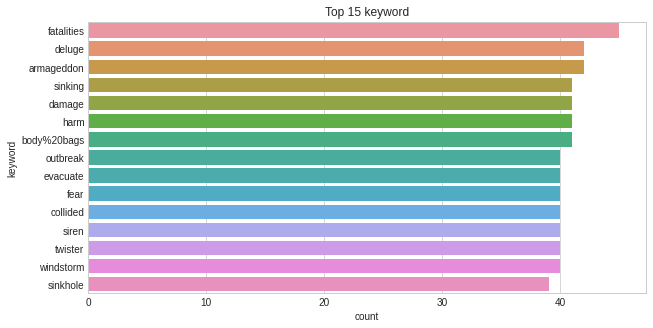

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df.keyword, order = df.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keyword')
plt.show()

### Getting the most common words

In [45]:
def create_corpus(target):
    corpus = []
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    
    return corpus

corpus_disaster = create_corpus(1)
corpus_nondisaster = create_corpus(0)

In [46]:
nltk.download('stopwords') #Downloading stop words to use it
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

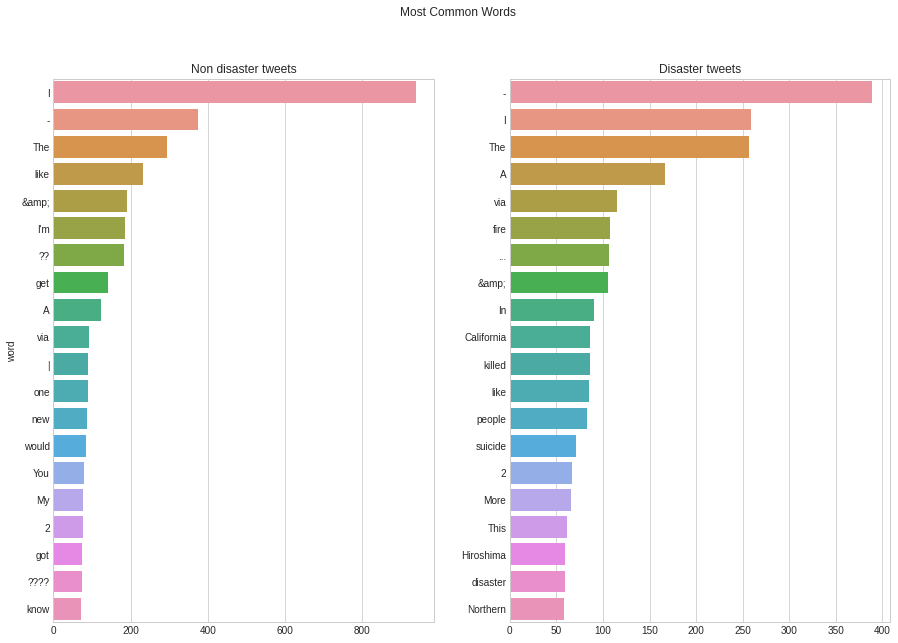

In [47]:
stop_words = stopwords.words('english')
common_words_disaster = []
common_words_nondisaster = []

for word in corpus_disaster:
    if word not in stop_words:
        common_words_disaster.append(word)
        
for word in corpus_nondisaster:
    if word not in stop_words:
        common_words_nondisaster.append(word)
        
counter_disaster = Counter(common_words_disaster)
counter_nondisaster = Counter(common_words_nondisaster)

x_disaster, y_disaster = map(list, zip(*counter_disaster.most_common()[:20]))
x_nondisaster, y_nondisaster = map(list, zip(*counter_nondisaster.most_common()[:20]))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))

sns.barplot(x=y_disaster, y=x_disaster, ax=ax2)
ax2.set_title('Disaster tweets')

sns.barplot(x=y_nondisaster, y=x_nondisaster, ax=ax1)
ax1.set(ylabel='word', title='Non disaster tweets')

fig.suptitle('Most Common Words')
plt.show()

### Getting the most common stopwords

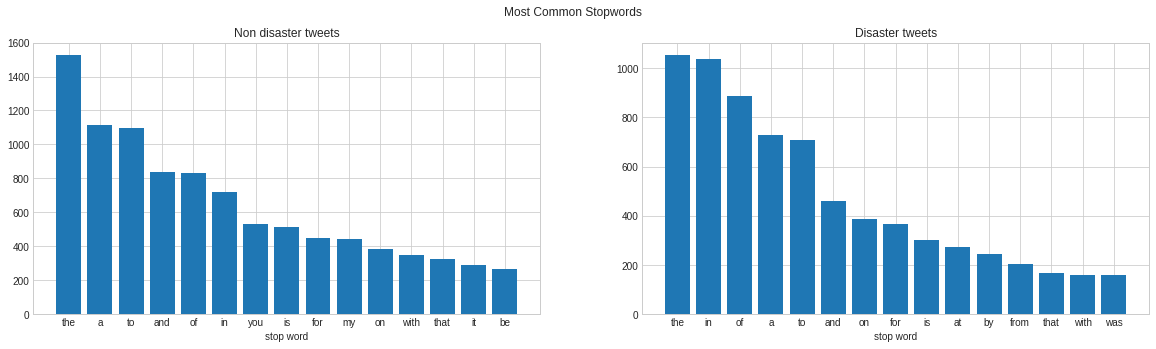

In [48]:
stop_words = stopwords.words('english')
stop_words_disaster = []
stop_words_nondisaster = []

for word in corpus_disaster:
    if word in stop_words:
        stop_words_disaster.append(word)
        
for word in corpus_nondisaster:
    if word in stop_words:
        stop_words_nondisaster.append(word)
        
counter_disaster = Counter(stop_words_disaster)
counter_nondisaster = Counter(stop_words_nondisaster)

x_disaster, y_disaster = list(zip(*counter_disaster.most_common()[:15]))
x_nondisaster, y_nondisaster = list(zip(*counter_nondisaster.most_common()[:15]))

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

ax1.bar(x_nondisaster, y_nondisaster)
ax1.set(xlabel='stop word', title='Non disaster tweets')

ax2.bar(x_disaster, y_disaster)
ax2.set(xlabel='stop word', title='Disaster tweets')

fig.suptitle('Most Common Stopwords')
plt.show()

### Prepare the train and test sets

In [49]:
df_train = pd.read_csv('/train.csv', sep=',')
df_test = pd.read_csv('/test.csv', sep=',')

In [50]:
df_train = df_train.drop(['keyword','location'], axis=1)
df_test = df_test.drop(['keyword','location'], axis=1)

In [51]:
x_train = df_train.sort_values(by= ['id'], ascending=True)
x_test = df_test.sort_values(by= ['id'], ascending=True)

In [52]:
twitts_train = x_train.loc[:,x_train.columns=='text'].values.flatten()
twitts_test = x_test.loc[:,x_test.columns=='text'].values.flatten()

In [53]:
print(twitts_train[:10])

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'
 "I'm on top of the hill and I can see a fire in the woods..."
 "There's an emergency evacuation happening now in the building across the street"
 "I'm afraid that the tornado is coming to our area..."]


### Import the deep learning libraries

In [54]:
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout 

### Tokenize the data

In [55]:
tok = Tokenizer()
def preprocess(text):
    seqs = tok.fit_on_texts(text)
    return seqs

In [56]:
tokens=preprocess(twitts_train)

### Convert text to sequences

In [57]:
X_train = tok.texts_to_sequences(twitts_train)
X_test = tok.texts_to_sequences(twitts_test)

In [58]:
X_train = np.array(X_train, dtype=object)
X_test = np.array(X_test, dtype=object)
X_train = keras.preprocessing.sequence.pad_sequences(X_train)
X_test = keras.preprocessing.sequence.pad_sequences(X_test)

In [59]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  119 4633   24    4  868    8   21  263
  138 1619 4634   89   40]


### Check the size of the vocab

In [60]:
vocab_size = len(tok.word_index)
print('Size of vocabulary:', vocab_size)

Size of vocabulary: 22700


### Getting the Testset ready

In [61]:
y_train = df_train.target.values

In [62]:
print(y_train[0])

1


### Split the data

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_val, y, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### Structure of LSTM model

In [64]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size+2, output_dim = 32, name='Embedding'))
model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, None, 32)          726464    
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 817,217
Trainable params: 817,217
Non-trai

### Train the model

In [65]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
history = model.fit(x_train, y, validation_data=(x_val,y_val), shuffle=True, epochs=4, batch_size=128, callbacks=[callback])

Epoch 1/6
42/42 [==============================] - 10s 136ms/step - loss: 0.6699 - accuracy: 0.5787 - val_loss: 0.6362 - val_accuracy: 0.6677
Epoch 2/6
42/42 [==============================] - 5s 125ms/step - loss: 0.5052 - accuracy: 0.7654 - val_loss: 0.4826 - val_accuracy: 0.7990
Epoch 3/6
42/42 [==============================] - 5s 125ms/step - loss: 0.2647 - accuracy: 0.9052 - val_loss: 0.4853 - val_accuracy: 0.7977
Epoch 4/6
42/42 [==============================] - 5s 129ms/step - loss: 0.1323 - accuracy: 0.9567 - val_loss: 0.5878 - val_accuracy: 0.7715


### Evaluate the model

In [66]:
train_score = model.evaluate(x_val, y_val)

72/72 [==============================] - 1s 13ms/step - loss: 0.5878 - accuracy: 0.7715


### Making predictions

In [67]:
preds = np.where(model.predict(X_test)>0.5,1.0,0.0).flatten().astype('int32')

In [68]:
results = {'text':twitts_test, 'target':preds}
df_results = pd.DataFrame(results)
df_results.head()

,text,target
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",1
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
